# Example Notebook

In [1]:
from stream_nwbfile import stream_nwbfile
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_left

This notebook showcases the example session from the 001343 dataset containing navigation behavior and concurrent SpikeGadgets recordings in hippocampal subfield CA1 and subiculum.

In [2]:
DANDISET_ID = '001343'
file_path = 'sub-SL18/sub-SL18_behavior+ecephys+image.nwb'
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

Data type,int16
Shape,"(481366968, 224)"
Array size,200.84 GiB
Chunk shape,"(78125, 64)"
Compression,gzip
Compression opts,4
Compression ratio,1.2433610643657511
Data type,float64
Shape,"(481366968,)"
Array size,3.59 GiB
Chunk shape,"(1250000,)"


Notice that task epochs alternate between Sleep and a behavioral shuttle task.

In [3]:
sleep_df = nwbfile.processing["tasks"].data_interfaces["Sleep"].to_dataframe()
shuttle_task_df = nwbfile.processing["tasks"].data_interfaces["HomeAltVisitAll"].to_dataframe()
epochs_df = nwbfile.epochs.to_dataframe()
print("Sleep")
display(sleep_df)
print("Shuttle Task")
display(shuttle_task_df)
print("Epochs")
display(epochs_df)

Sleep


,task_name,task_description,task_environment,camera_id,led_configuration,led_list,led_positions,task_epochs
id,,,,,,,,
0,Sleep,The animal sleeps in a small empty box.,SLP,[0],single,redled,center,"[1, 3, 5, 7]"


Shuttle Task


,task_name,task_description,task_environment,camera_id,led_configuration,led_list,led_positions,task_epochs
id,,,,,,,,
0,HomeAltVisitAll,Shuttle task between home and 4 destinations.,BOX,[1],left/right,"redled,greenled","right,left","[2, 4, 6]"


Epochs


,start_time,stop_time,tags
id,,,
0,268.572200,2109.490567,[01]
1,2446.715000,5232.523233,[02]
2,5385.869833,7586.034767,[03]
3,7807.940267,10222.122933,[04]
4,10475.450200,13072.916633,[05]
5,13266.609733,15182.446400,[06]
6,15278.806033,17666.761833,[07]


Get plotting window (Middle of the first shuttle task epoch, i.e. epoch 2)

In [4]:
plotting_start_time = 3500.0
plotting_stop_time = plotting_start_time + 5.0  # 5 second window
print(f"Plotting window: {plotting_start_time} to {plotting_stop_time} seconds")
plotting_start_index = bisect_left(nwbfile.acquisition["ElectricalSeries"].timestamps, plotting_start_time)
plotting_stop_index = bisect_left(nwbfile.acquisition["ElectricalSeries"].timestamps, plotting_stop_time)
plotting_slice = slice(plotting_start_index, plotting_stop_index)
print(f"Plotting indices: {plotting_start_index} to {plotting_stop_index} (exclusive)")

Plotting window: 3500.0 to 3505.0 seconds
Plotting indices: 86443818 to 86593818 (exclusive)


Get electrodes for nTrode1

In [5]:
electrodes_df = nwbfile.electrodes.to_dataframe()
nTrode1_electrodes = electrodes_df[electrodes_df['group_name'] == 'nTrode1']
electrode_indices = nTrode1_electrodes.index.values
nTrode1_electrodes

,location,group,group_name,channel_name,hasLFP,ref_elect_id,chID,probe_shank,probe_electrode,bad_channel
id,,,,,,,,,,
8,Right hippocampal subfield CA1,nTrode1 abc.NwbElectrodeGroup at 0x5966900608\...,nTrode1,hwChan65,True,65,nTrode1_elec1,0,65,False
21,Right hippocampal subfield CA1,nTrode1 abc.NwbElectrodeGroup at 0x5966900608\...,nTrode1,hwChan67,False,67,nTrode1_elec2,0,67,False
34,Right hippocampal subfield CA1,nTrode1 abc.NwbElectrodeGroup at 0x5966900608\...,nTrode1,hwChan69,False,69,nTrode1_elec3,0,69,False
47,Right hippocampal subfield CA1,nTrode1 abc.NwbElectrodeGroup at 0x5966900608\...,nTrode1,hwChan71,False,71,nTrode1_elec4,0,71,False


Get LFP index for nTrode1 and plotting_slice

In [6]:
lfp_electrodes_df = electrodes_df.iloc[nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["ElectricalSeriesLFP"].electrodes.data[:]]
nTrode1_lfp_index = np.where(lfp_electrodes_df["group_name"] == "nTrode1")[0][0]
print(nTrode1_lfp_index)

lfp_plotting_start_index = bisect_left(nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["ElectricalSeriesLFP"].timestamps, plotting_start_time)
lfp_plotting_stop_index = bisect_left(nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["ElectricalSeriesLFP"].timestamps, plotting_stop_time)
lfp_plotting_slice = slice(lfp_plotting_start_index, lfp_plotting_stop_index)

8


Get Units for nTrode1

In [7]:
units_df = nwbfile.units.to_dataframe()
nTrode1_units = units_df[units_df['nTrode'] == 1]
nTrode1_units

,nTrode,unitInd,globalID,nWaveforms,waveformFWHM,waveformPeakMinusTrough,spike_times,electrode_group
id,,,,,,,,
59,1,1,nTrode1_unit1,3585,0.238071,1136,"[325.090733333333, 325.6376, 325.677866666667,...",nTrode1 abc.NwbElectrodeGroup at 0x5966900608\...
60,1,2,nTrode1_unit2,10745,0.296261,1103,"[271.756933333333, 272.3406, 272.451366666667,...",nTrode1 abc.NwbElectrodeGroup at 0x5966900608\...
61,1,3,nTrode1_unit3,10975,0.287069,745,"[2452.31, 2452.7101, 2457.16183333333, 2463.77...",nTrode1 abc.NwbElectrodeGroup at 0x5966900608\...
62,1,4,nTrode1_unit4,295,0.254280,1482,"[357.468366666667, 357.480533333333, 396.89313...",nTrode1 abc.NwbElectrodeGroup at 0x5966900608\...


Retrieve Ephys Data for nTrode1

In [8]:
# Ephys
electrical_series = np.asarray(nwbfile.acquisition["ElectricalSeries"].data[plotting_slice, electrode_indices])
raw_to_uV = nwbfile.acquisition["ElectricalSeries"].conversion * 1e6
electrical_series_in_uV = electrical_series * raw_to_uV
electrical_series_timestamps = np.asarray(nwbfile.acquisition["ElectricalSeries"].timestamps[plotting_slice])
lfp = np.asarray(nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["ElectricalSeriesLFP"].data[lfp_plotting_slice, nTrode1_lfp_index])
lfp_conversion = nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["ElectricalSeriesLFP"].conversion * 1e6
lfp_in_uV = lfp * lfp_conversion
lfp_timestamps = np.asarray(nwbfile.processing["ecephys"].data_interfaces["LFP"].electrical_series["ElectricalSeriesLFP"].timestamps[lfp_plotting_slice])

# Sorted Units
spike_times = []
for i, row in nTrode1_units.iterrows():
    plotting_spike_time_mask = (row["spike_times"] >= plotting_start_time) & (row["spike_times"] < plotting_stop_time)
    plotting_spike_times = row["spike_times"][plotting_spike_time_mask]
    spike_times.append(plotting_spike_times)

Plot Example Tetrode

Text(0.5, 0, 'Time (s)')

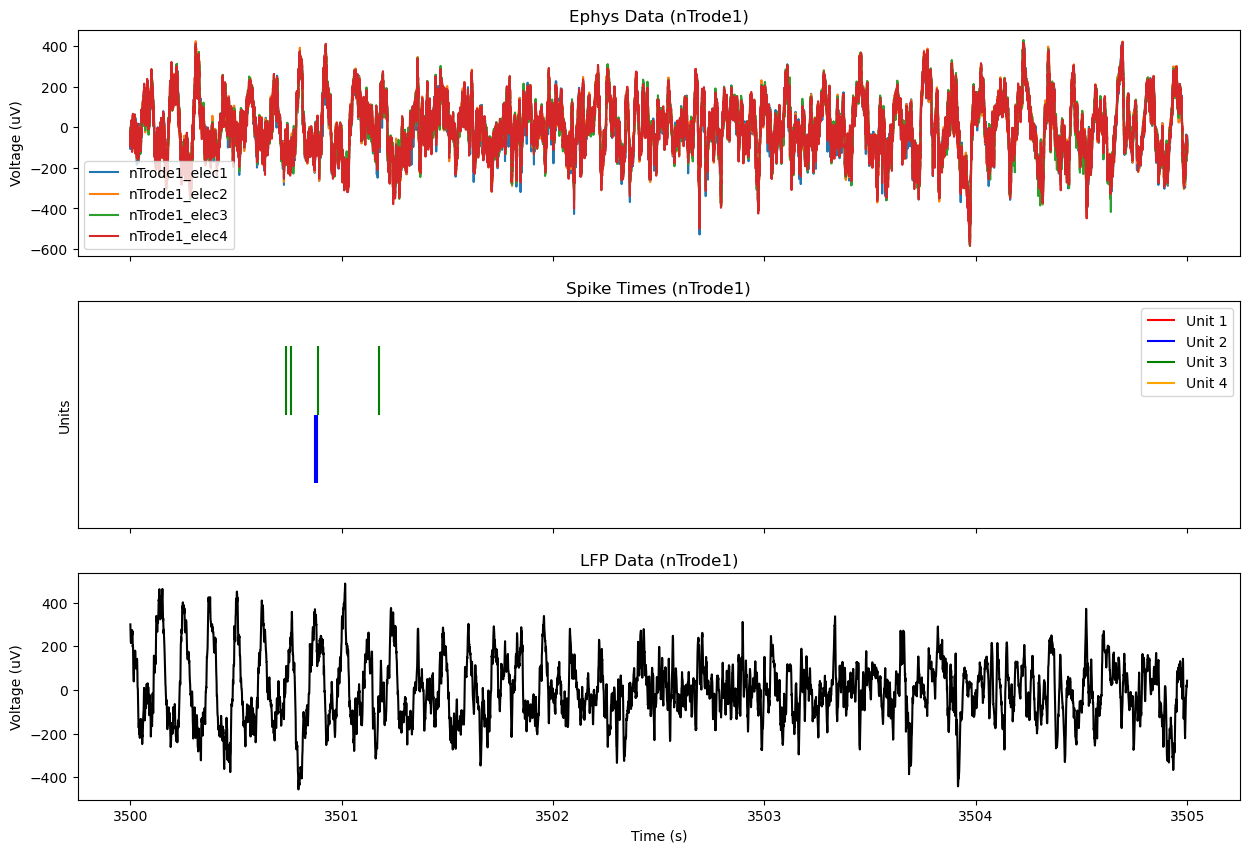

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
ax[0].plot(electrical_series_timestamps, electrical_series_in_uV)
ax[0].set_ylabel("Voltage (uV)")
ax[0].set_title("Ephys Data (nTrode1)")
ax[0].legend([channel_id for channel_id in nTrode1_electrodes['chID'].values])
colors = ['red', 'blue', 'green', 'orange']
for i, (idx, row) in enumerate(nTrode1_units.iterrows()):
    plotting_spike_time_mask = (row["spike_times"] >= plotting_start_time) & (row["spike_times"] < plotting_stop_time)
    plotting_spike_times = row["spike_times"][plotting_spike_time_mask]
    unit_ind = row["unitInd"]
    ax[1].eventplot(plotting_spike_times, lineoffsets=i, colors=colors[i], label=f"Unit {unit_ind}")
ax[1].set_yticks([])
ax[1].set_ylabel("Units")
ax[1].set_title("Spike Times (nTrode1)")
ax[1].legend()

ax[2].plot(lfp_timestamps, lfp_in_uV, color='black')
ax[2].set_ylabel("Voltage (uV)")
ax[2].set_title("LFP Data (nTrode1)")
ax[2].set_xlabel("Time (s)")

Get Behavior Data for second epoch

In [10]:
event_names = [
    "reward_well_1",
    "reward_well_2",
    "reward_well_3",
    "reward_well_4",
    "reward_well_5",
    "reward_well_6",
    "reward_well_7",
    "reward_well_8",
    "reward_pump_1",
    "reward_pump_2",
    "reward_pump_3",
    "reward_pump_4",
    "reward_pump_5",
]
behavioral_events = nwbfile.processing["behavior"].data_interfaces["behavioral_events"].time_series
name_to_timestamps = {name: behavioral_events[name].timestamps[:] for name in event_names}
plotting_start_time = epochs_df.start_time.iloc[1]
plotting_stop_time = epochs_df.stop_time.iloc[1]
name_to_timestamps_plotting = {
    name: timestamps[(timestamps >= plotting_start_time) & (timestamps < plotting_stop_time)]
    for name, timestamps in name_to_timestamps.items()
}

Plot Behavior Data

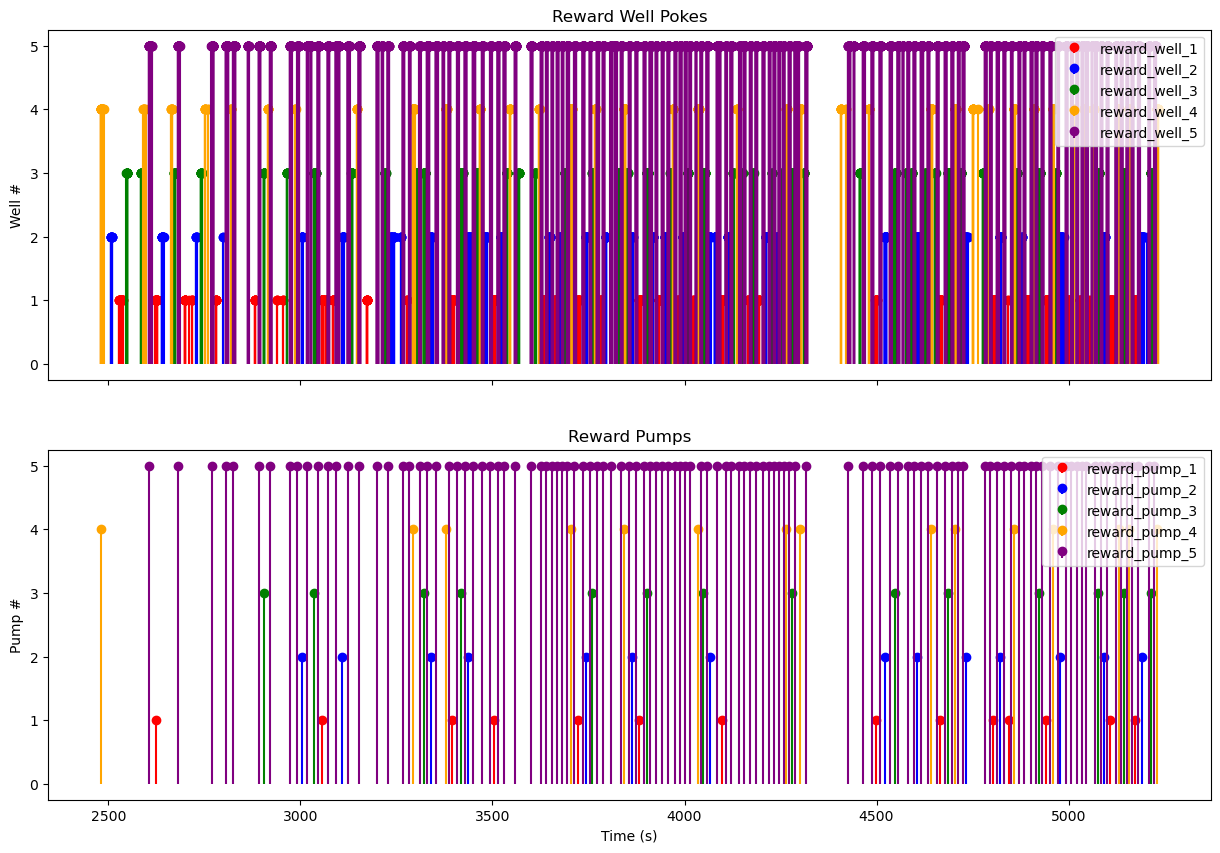

In [11]:
well_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot reward well pokes
for i in range(1, 9):
    well_name = f"reward_well_{i}"
    if name_to_timestamps_plotting[well_name].size == 0:
        continue
    axs[0].stem(name_to_timestamps_plotting[well_name], 
                np.ones_like(name_to_timestamps_plotting[well_name]) * i, 
                linefmt=f'{well_colors[i-1]}', 
                markerfmt=f'{well_colors[i-1]}', 
                basefmt=' ', 
                label=well_name)

# Plot reward pumps
for i in range(1, 6):
    pump_name = f"reward_pump_{i}"
    if name_to_timestamps_plotting[pump_name].size == 0:
        continue
    axs[1].stem(name_to_timestamps_plotting[pump_name], 
                np.ones_like(name_to_timestamps_plotting[pump_name]) * i, 
                linefmt=f'{well_colors[i-1]}', 
                markerfmt=f'{well_colors[i-1]}', 
                basefmt=' ', 
                label=pump_name)
    
# Add axis labels and titles
axs[0].set_ylabel("Well #")
axs[0].set_title("Reward Well Pokes")

axs[1].set_ylabel("Pump #")
axs[1].set_title("Reward Pumps")
axs[1].set_xlabel("Time (s)")

# Show legends
for ax in axs:
    ax.legend(loc="upper right")

Get DLC data for the second epoch

In [12]:
pose_estimation_series = nwbfile.processing["behavior"].data_interfaces["PoseEstimation_S02_F01_Home+4_HomeAltVisitAll"].pose_estimation_series
name_to_data = {name: series.data[:] for name, series in pose_estimation_series.items()}
pes_timestamps = pose_estimation_series["PoseEstimationSeriesBaseoftail"].timestamps[:]

Plot DLC data

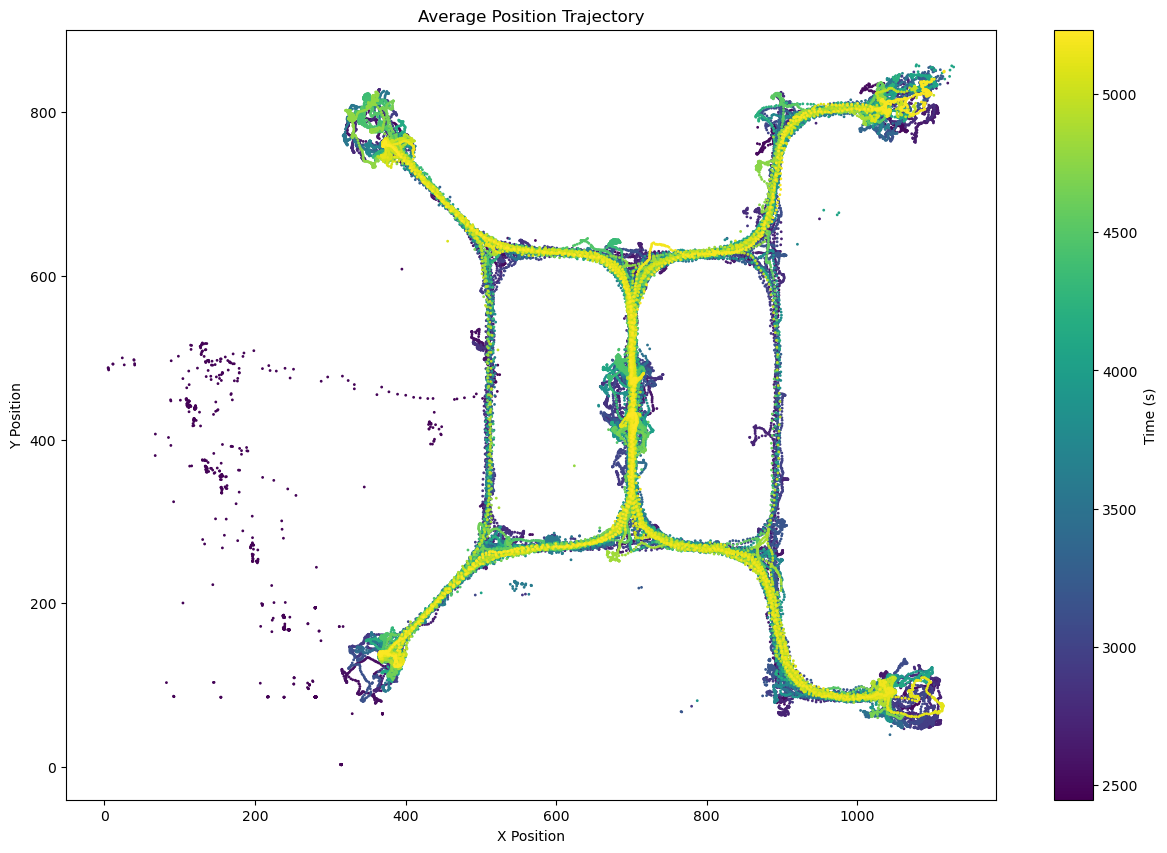

In [13]:
plt.figure(figsize=(15, 10))
all_x = np.array([data[:, 0] for data in name_to_data.values()])
all_y = np.array([data[:, 1] for data in name_to_data.values()])

x = np.nanmean(all_x, axis=0)
y = np.nanmean(all_y, axis=0)

sc = plt.scatter(x, y, c=pes_timestamps, cmap='viridis', s=1)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Average Position Trajectory')
plt.colorbar(sc, label='Time (s)')